In [1]:
import seaborn as sns
import matplotlib as mpl
import _init_
from constants import *
from set_path import *
from config import *
from functions import *
import scipy.integrate as integrate
import matplotlib.colors as mcolors
import matplotlib.cm

In [2]:
tdyn = rmax/v0
sat_time = (Sigma0/G0)/Myr
xi_sol = np.log(G0*t0/Sigma0)
xi_sol, G0

(-3.3011022787786, 9.478378378378378e-18)

# Fixed Solid Angle Case

In [3]:
Gamma = np.logspace(-2, 2., 20)
xi_arr = np.linspace(-5, 5., 20) #xi = np.log(t0*G0/Sigma0)
sat_rate = 1./sat_time

a = rmax/r0

dMassHI = np.zeros((xi_arr.shape[0], Gamma.shape[0]))
dMasstot = np.zeros((xi_arr.shape[0], Gamma.shape[0]))
i = j =0 
for xi in xi_arr:
    j=0
    for gamma in Gamma:
        xcrit = np.log(gamma)
        if(xcrit<0.0):
            xhigh = 1.*xcrit
            xlow  = 1.5*xcrit
        else:
            xhigh = 1.*xcrit
            xlow  = 0.5*xcrit
            
        G0 = Sigma0*np.exp(xi)/t0
        
        dMassHI[i,j] = integrate.dblquad(dMass_HI, 1, a, xlow, xhigh,   \
                                            args=(gamma, r0/v0, G0, Sigma0, Mach, 2))[0]
        
        dMasstot[i,j] = integrate.dblquad(dMass_tot, 1, a, xlow, xhigh,  \
                                            args=(gamma, r0/v0, G0, Sigma0, Mach, 2))[0] 
        
        j+=1
            
    i+=1
    


/Users/aditivijayan/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/quadpack.py:879: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/Users/aditivijayan/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/quadpack.py:879: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/Users/aditivijayan/opt/anaconda3/lib/python3.9/site-packages/scipy/integrate/quadpack.py:879: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised t

NameError: name 'dMassFluxHI' is not defined

In [5]:
dMass = dMassHI/dMasstot
FH2_fSA = 1. - dMassFlux
np.amax(FH2_fSA),np.amin(FH2_fSA)

(0.999468020218746, 0.0)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(0.01, 100.0)

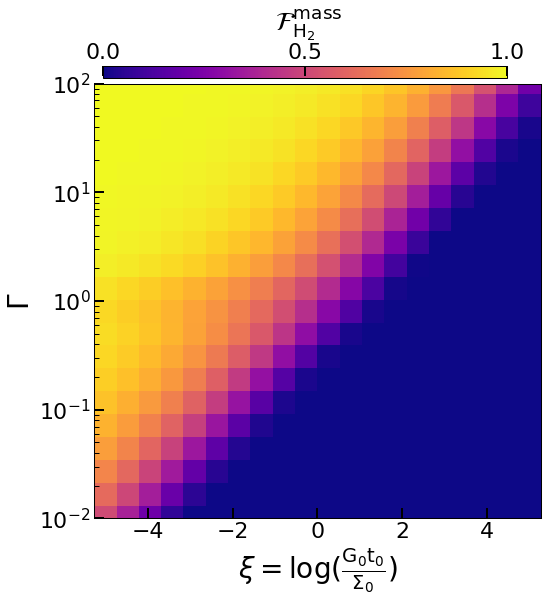

In [9]:
fig, ax = plt.subplots(1, 1, gridspec_kw = {'wspace':0.00, 'hspace':0.00},figsize=(8,8))

cbarx    = 0.141
cbheight = 0.02
cbary = 0.89
cblen = 0.7
dx1 = 0.4
cbtitlex = 0.1


plot = ax.pcolormesh(xi_arr, Gamma, np.transpose(FH2_fSA),\
                    vmin=0.0, vmax=1.,
                    cmap='plasma')
cax = fig.add_axes([cbarx, cbary, cblen, cbheight])
fig.colorbar(plot, cax=cax, orientation='horizontal', ticks=(0.0, 0.5, 1.))
cax.xaxis.set_ticks_position('top')
cax.set_title(r" $\mathcal{F}_{\rm H_2}^{\rm mass}}$")

ax.set_ylabel(r'$\Gamma$', fontsize=28)
ax.set_xlabel(r'$\xi=\rm{log}(\frac{G_0 t_0}{\Sigma_0})$', fontsize=28)
# ax.text(0.56, 0.14,r'$\mathcal{M}=%.f$'%(Mach), transform=ax.transAxes, color='white', fontsize=26)
ax.legend(loc='lower left', frameon=False, labelcolor='white')
# ax.axvline(xi_sol, ls='--', color='red')
file_name = os.path.join(fig_path, 'gamma_Mach_sinv_38M.jpeg')
ax.set_yscale('log')

x_arr = np.linspace(-5,5,20)
y_arr = 0.5*(10.**x_arr) **(3.5/8.)
# ax.plot(x_arr, y_arr, color='white', label=r'$\Gamma \propto (G_0 t_0/\Sigma_0)^{0.43}$')
ax.set_ylim(np.amin(Gamma),np.amax(Gamma))
# ax.legend()
# plt.savefig(file_name, bbox_inches='tight', dpi=160 )